In [1]:
#Week.16 , Assignment.2

In [2]:
#Question.1 : What is the mathematical formula for a linear SVM?
#Answer.1 : # Linear Support Vector Machine (SVM) mathematical formulation

# Decision function:
# f(x) = sign(w * x + b)

# Components:
# - f(x): Decision function that determines the class label of the input vector x.
# - w: Weight vector, perpendicular to the hyperplane.
# - x: Input feature vector.
# - b: Bias term.

# SVM Classifier:
# - Assigns a positive class label (+1) if f(x) is positive.
# - Assigns a negative class label (-1) if f(x) is negative.

# Optimization Problem:
# Minimize (1/2 * ||w||^2), subject to the constraint:
#   - y_i * (w * x_i + b) >= 1 for all i

# Components:
# - ||w||: Norm of the weight vector.
# - y_i: Class label for the ith data point (+1 or -1).
# - x_i: Feature vector for the ith data point.

# Objective:
# - Find optimal values for w and b that maximize the margin between classes while satisfying classification
#constraints.

# Mathematical Formulation:
# minimize (1/2 * ||w||^2) subject to y_i * (w * x_i + b) >= 1 for all i

# Note:
# - Assumes linear separability.
# - Additional considerations may be needed for non-linearly separable data, such as introducing slack variables
#or using non-linear kernels.


In [3]:
#Question.2 : What is the objective function of a linear SVM?
#Answer.2 : # Linear Support Vector Machine (SVM) Objective Function

# Objective:
# Minimize (1/2 * ||w||^2), subject to the constraint y_i * (w * x_i + b) >= 1 for all i

# Components:
# - ||w||: Norm of the weight vector.
# - w: Weight vector.
# - x_i: Feature vector for the ith data point.
# - y_i: Class label for the ith data point (+1 or -1).
# - b: Bias term.

# Objective Function:
# Minimize (1/2 * ||w||^2)

# Constraints:
# - Ensure that each data point is correctly classified and lies on the correct side of the hyperplane:
#   y_i * (w * x_i + b) >= 1 for all i

# Geometric Interpretation:
# - The objective function penalizes the magnitude of the weight vector to prevent overfitting.
# - Constraints enforce that the distance between the hyperplane and the nearest data point of each class is at
#least 1 (margin).

# Optimization:
# - Solving this optimization problem yields the optimal parameters (w, b) for the linear SVM.
# - Techniques like quadratic programming are commonly used for optimization.


In [4]:
#Question.3 : What is the kernel trick in SVM?
#Answer.3 : # Kernel Trick in Support Vector Machines (SVM)

# The Kernel Trick:
# - In SVM, the kernel trick is a technique that allows the algorithm to operate in a high-dimensional feature space
#   without explicitly calculating the transformed feature vectors.

# Motivation:
# - Enables SVM to handle complex, non-linear relationships in the data efficiently.
# - Operates in the higher-dimensional space without the need for explicit feature transformation.

# Kernel Function:
# - A kernel function computes the dot product between the transformed feature vectors.
# - Common kernels include linear, polynomial, radial basis function (RBF/Gaussian), and sigmoid.

# Mathematical Representation:
# - Decision function with the kernel trick: f(x) = sign(sum(alpha_i * y_i * K(x_i, x) + b)
#   Here, K(x_i, x) is the kernel function, and alpha_i and y_i are Lagrange multipliers and class labels.

# Advantages:
# - Handles non-linear decision boundaries effectively.
# - Avoids explicit computation of high-dimensional feature vectors, saving computational resources.

# Common Kernel Functions:
# 1. Linear Kernel: K(x_i, x) = x_i * x (equivalent to the standard SVM without explicit transformation).
# 2. Polynomial Kernel: K(x_i, x) = (gamma * (x_i * x + coef0))^degree
# 3. Radial Basis Function (RBF) or Gaussian Kernel: K(x_i, x) = exp(-gamma * ||x_i - x||^2)
# 4. Sigmoid Kernel: K(x_i, x) = tanh(gamma * (x_i * x + coef0))

# Usage:
# - Choose the appropriate kernel based on the problem characteristics.
# - Tune kernel parameters (gamma, degree, coef0) for optimal performance.


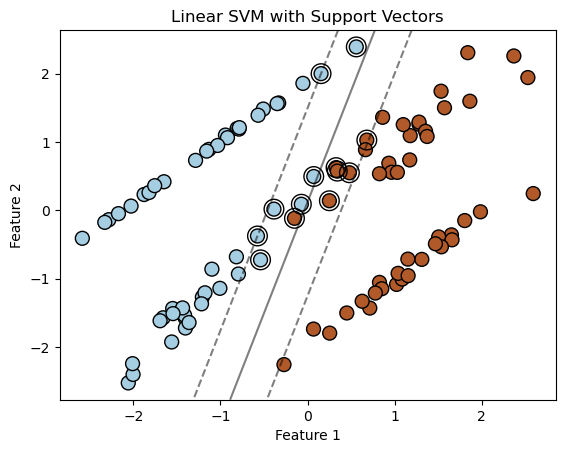

In [5]:
#Question.4 : What is the role of support vectors in SVM Explain with example
#Answer.4 : # Role of Support Vectors in Support Vector Machines (SVM)

# 1. Defining the Hyperplane:
#    - SVM aims to find a hyperplane that separates the data into different classes.
#    - The hyperplane is chosen to maximize the margin, the distance between the hyperplane and the nearest data points.

# 2. Support Vectors:
#    - Support vectors are data points closest to the decision boundary.
#    - These critical points influence the position and orientation of the decision boundary.
#    - They are crucial for determining the margin and the overall model.

# 3. Margin:
#    - The margin is the distance between the decision boundary and the nearest support vectors.
#    - SVM aims to maximize the margin to create a robust and generalized model.
#    - Larger margin indicates better separation between classes.

# 4. Determining the Decision Boundary:
#    - The decision boundary is defined by the support vectors.
#    - Orientation of the hyperplane is influenced by the positions of these critical points.
#    - Non-support vectors that are far from the margin do not affect the decision boundary.

# Example using a linear SVM:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Generate a simple dataset
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit a linear SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margin lines
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')
plt.title('Linear SVM with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


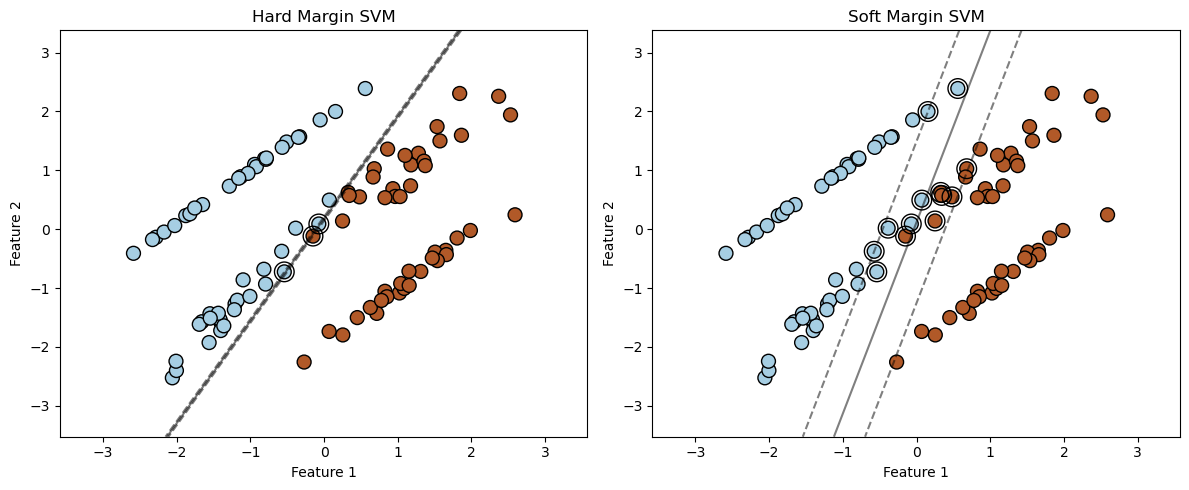

In [9]:
#Question.5 : Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
#SVM?
#Answer.5 : # Illustration of Hyperplane, Marginal Plane, Soft Margin, and Hard Margin in SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate a simple dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Helper function to plot SVM decision function, margin, and support vectors
def plot_svm(model, ax, title):
    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100)

    # Plot decision boundary and margins
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Hard Margin SVM (C=1e10, a very large value)
model_hard_margin = SVC(kernel='linear', C=1e10)
model_hard_margin.fit(X, y)

# Soft Margin SVM (C=1, a smaller value)
model_soft_margin = SVC(kernel='linear', C=1)
model_soft_margin.fit(X, y)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_svm(model_hard_margin, ax[0], 'Hard Margin SVM')
plot_svm(model_soft_margin, ax[1], 'Soft Margin SVM')

plt.tight_layout()
plt.show()


Accuracy: 0.90


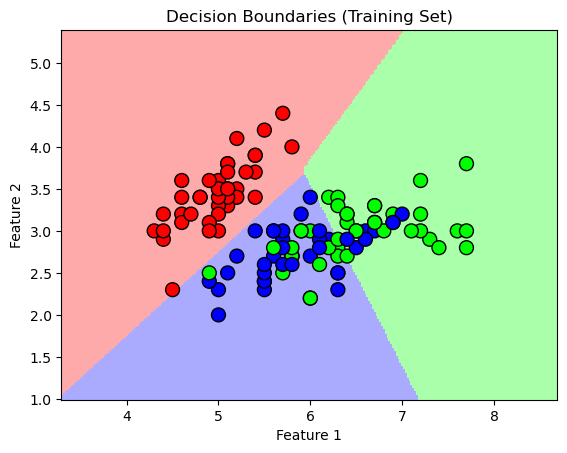

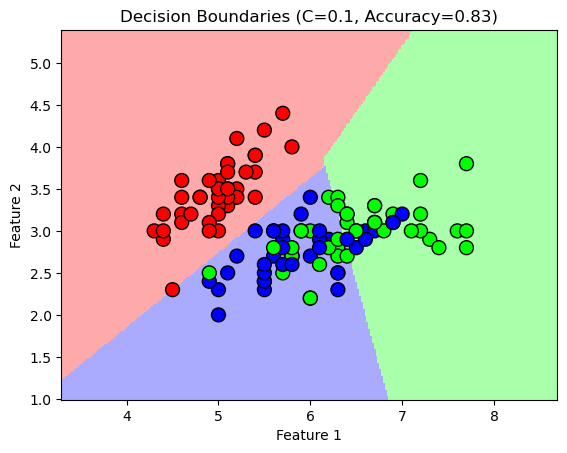

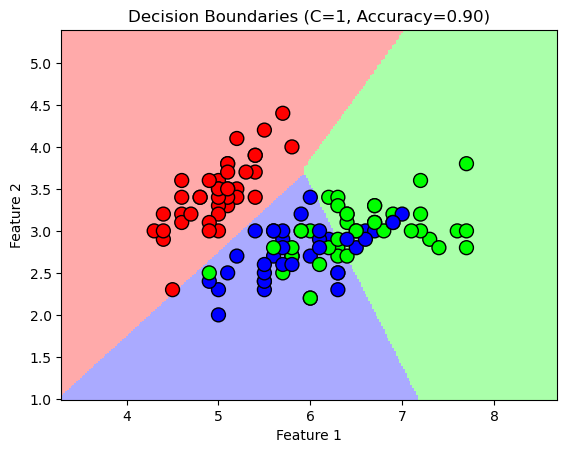

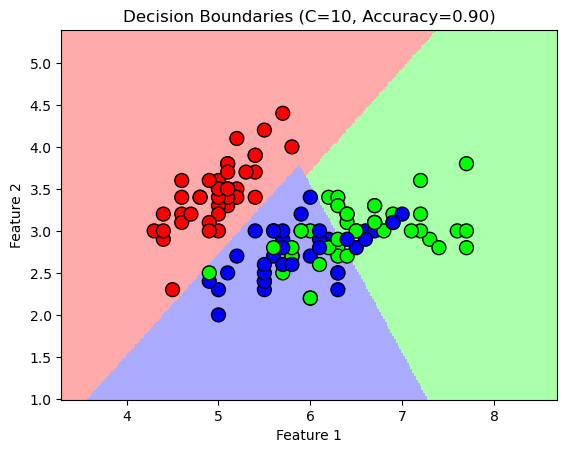

In [10]:
#Question.6 : Q6. SVM Implementation through Iris dataset.
#~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing set
#~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
#~ Compute the accuracy of the model on the testing setl
#~ Plot the decision boundaries of the trained model using two of the featuresl
#~ Try different values of the regularisation parameter C and see how it affects the performance of
#the model.
#Answer.6 : 
# SVM Implementation through Iris dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only two features for visualization
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier on the training set
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = model.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundaries of the trained model using two features
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', marker='o', s=100)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot decision boundaries for the trained model
plot_decision_boundary(X_train, y_train, model, 'Decision Boundaries (Training Set)')

# Try different values of the regularization parameter C
C_values = [0.1, 1, 10]
for C in C_values:
    model_c = SVC(kernel='linear', C=C)
    model_c.fit(X_train, y_train)
    accuracy_c = accuracy_score(y_test, model_c.predict(X_test))
    plot_decision_boundary(X_train, y_train, model_c, f'Decision Boundaries (C={C}, Accuracy={accuracy_c:.2f})')

plt.show()


Accuracy (Scratch): 0.67
Accuracy (Scikit-Learn): 1.00


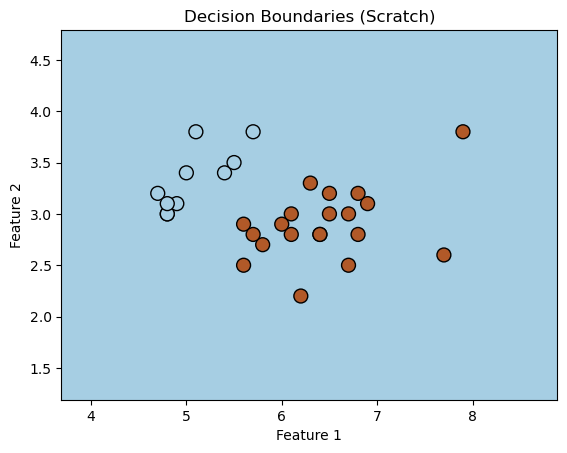

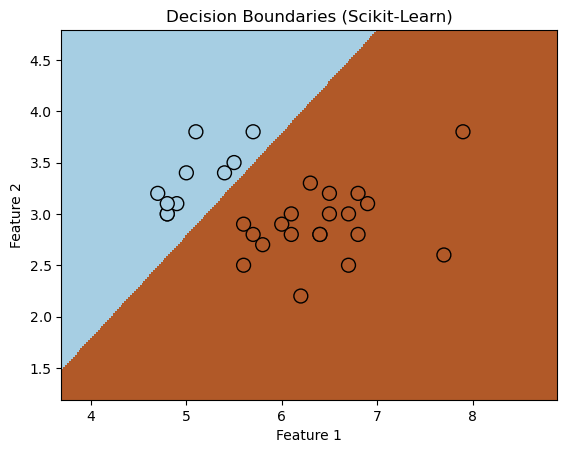

In [11]:
#Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
#performance with the scikit-learn implementation.
#Answer : 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only two features for simplicity
y = iris.target

# Convert labels to binary classification (0 or 1)
y_binary = np.where(y == 0, -1, 1)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Linear SVM from scratch using gradient descent
class LinearSVM:
    def __init__(self, learning_rate=0.01, epochs=1000, C=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.C = C
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X[i], self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)

# Train the linear SVM from scratch
svm_scratch = LinearSVM(C=1)
svm_scratch.fit(X_train, y_train)

# Predict labels for the testing set
y_pred_scratch = svm_scratch.predict(X_test)

# Compute the accuracy of the model
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'Accuracy (Scratch): {accuracy_scratch:.2f}')

# Compare with scikit-learn's implementation
svm_sklearn = SVC(kernel='linear', C=1)
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Accuracy (Scikit-Learn): {accuracy_sklearn:.2f}')

# Plot decision boundaries for both models
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    cmap_light = plt.cm.Paired
    cmap_bold = plt.cm.Paired

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', marker='o', s=100)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot decision boundaries for both models
plot_decision_boundary(X_test, y_test, svm_scratch, 'Decision Boundaries (Scratch)')
plot_decision_boundary(X_test, y_test, svm_sklearn, 'Decision Boundaries (Scikit-Learn)')

plt.show()
